In [1]:
import pyreadr
import numpy as onp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import jax.numpy as jnp
from scipy.stats import linregress

import sys
sys.path.append("../../../models")
# from linear_cr import LinearCR
from linear_cr_new import LinearContrastiveRegression

/users/zhangby/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def return_indices_of_a(a, b):
  b_set = set(b)
  return [i for i, v in enumerate(a) if v in b_set]

In [3]:
df = pyreadr.read_r('../pb/L2or3.rds')[None]
hvg = pyreadr.read_r('../hvg1k/L2or3.rds')[None]
input1 = df.index.values.tolist()
input2 = hvg[None].to_list()
match_id = return_indices_of_a(input1,input2)
# print(len(match_id))
df = df.iloc[match_id]
print(df.shape)

(1000, 41)


In [4]:
score = pyreadr.read_r('../scoreA_pfc.rds')[None]
score

,sample,individual,diagnosis,ADIR.A,zscore
0,5144_PFC,5144.0,ASD,28,0.801567
1,5278_PFC,5278.0,ASD,22,-0.243955
2,5294_BA9,5294.0,ASD,17,-1.115224
3,5403_PFC,5403.0,ASD,30,1.150075
4,5419_PFC,5419.0,ASD,24,0.104552
5,5565_BA9,5565.0,ASD,27,0.627314
6,5864_BA9,5864.0,ASD,18,-0.940970
7,5939_BA9,5939.0,ASD,29,0.975821
8,5978_BA9,5978.0,ASD,13,-1.812239
9,6033_BA9,6033.0,ASD,26,0.453060


In [5]:
X = df[score['sample'][score['diagnosis']=='ASD'].to_list()].to_numpy().T
print(type(X))
print(X.shape)

Y = df[score['sample'][score['diagnosis']=='Control'].to_list()].to_numpy().T
print(type(Y))
print(Y.shape)

R = score['zscore'][score['diagnosis']=='ASD']
R = onp.atleast_2d(R).T
print(R)

<class 'numpy.ndarray'>
(10, 1000)
<class 'numpy.ndarray'>
(10, 1000)
[[ 0.80156729]
 [-0.24395526]
 [-1.11522406]
 [ 1.15007481]
 [ 0.10455226]
 [ 0.62731353]
 [-0.9409703 ]
 [ 0.97582105]
 [-1.81223909]
 [ 0.45305977]]


In [6]:
r2=[]
for d in range(2,9):
    print('==')
    print(d)
    model = LinearContrastiveRegression()
    model.fit(X, Y, R, d)
    preds = model.predict(X)
    _, _, r2_contrastivereg, _, _ = linregress(R.squeeze(), preds)
    r2.append(r2_contrastivereg)

==
2


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Step: 0               Log marginal lik.: -2600.33
Step: 200             Log marginal lik.: 19646.24
Step: 400             Log marginal lik.: 36723.68
Step: 600             Log marginal lik.: 43634.8
==
3
Step: 0               Log marginal lik.: -1871.69
Step: 200             Log marginal lik.: 20790.42
Step: 400             Log marginal lik.: 38892.94
Step: 600             Log marginal lik.: 48517.73
Step: 800             Log marginal lik.: 49411.85
==
4
Step: 0               Log marginal lik.: -2897.75
Step: 200             Log marginal lik.: 19470.82
Step: 400             Log marginal lik.: 38243.42
Step: 600             Log marginal lik.: 50923.89
Step: 800             Log marginal lik.: 53181.28
Step: 1000            Log marginal lik.: 53209.81
Step: 1200            Log marginal lik.: 53213.88
Step: 1400            Log marginal lik.: 53202.21
Step: 1600            Log marginal lik.: 53210.45
Step: 1800            Log marginal lik.: 53213.58
Step: 2000            Log marginal lik.: 

In [10]:
df = pd.DataFrame({'d':range(2,9), 'r2':r2})
df.to_csv('chooseD_R2.csv', index=False)

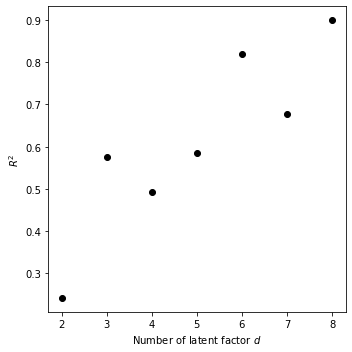

In [11]:
d=range(2,9)
plt.figure(figsize=(5, 5))
plt.subplot()
plt.scatter(d, r2, c="black")
plt.xlabel(r"Number of latent factor $d$")
plt.ylabel(r"$R^2$")
#plt.title(r"")

plt.tight_layout()
plt.show()